In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터프레임에 저장
pop = pd.read_csv("data/h17_21_df.csv",)

In [3]:
# melt 함수를 사용하여 변환, 
# id_vars - 행정구역열, var_name - 날짜 지정, value_name - 인구수 지정
popul = pd.melt(pop, id_vars=['행정구역'], var_name='날짜',value_name='인구수')
popul

,행정구역,날짜,인구수
0,전국,2017-01,"51,704,332"
1,서울특별시,2017-01,"9,930,478"
2,부산광역시,2017-01,"3,496,779"
3,대구광역시,2017-01,"2,484,688"
4,인천광역시,2017-01,"2,944,009"
...,...,...,...
1075,전라북도,2021-12,"1,786,855"
1076,전라남도,2021-12,"1,832,803"
1077,경상북도,2021-12,"2,626,609"
1078,경상남도,2021-12,"3,314,183"


In [4]:
# popul 데이터프레임에서 행정구역 열 값이 전국인 행만 추출
popul = popul[popul['행정구역'] == '전국']
# 인덱스 재설정, 행정구역 열 삭제
popul = popul.reset_index(drop=True)
popul.drop(['행정구역'], axis=1, inplace=True)

In [5]:
# df의 날짜 열 값을 - 기준으로 분리
popul[['연도', '월']] = popul['날짜'].str.split('-', expand=True)
# 날짜 열 삭제
popul.drop(['날짜'], axis=1, inplace=True)

In [6]:
popul[['연도', '월']] = popul[['연도', '월']].astype(int) #데이터 타입 정수형으로 변경

In [7]:
# 데이터프레임에 저장
elect = pd.read_csv("data/전력수급_월별평균최대전력.csv", encoding='cp949')

In [8]:
# elect df의 각 월별 전력수급량 데이터를 월 컬럼에 모두 통합하여 전력수급량 컬럼으로 만든다
elect = pd.melt(elect, id_vars=['연도'],var_name='월', value_name='전력수급량')

In [9]:
# 월명을 숫자로 변경
elect = elect.replace(['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'],['01','02','03','04','05','06','07','08','09','10','11','12'])
# sort_values 메소드 사용, 연도와 월을 기준으로 오름차순 정렬
elect = elect.sort_values(by=['연도', '월'], ascending=True)
# 2017~2021년까지의 데이터만 선택하여 elect df에 다시 할당
elect = elect[(elect['연도'] >= 2017) & (elect['연도'] <= 2021)]
# 인덱스 재설정
elect = elect.reset_index(drop=True)

In [10]:
elect['월'] = elect['월'].astype(int) # 정수형으로 변경

In [11]:
# 새 데이터프레임에 popul, elect할당
pop_elect =  pd.merge(popul, elect, on=['연도','월'], how='left')

In [12]:
# 인구수 컬럼의 값에서 ',' 제거
pop_elect['인구수'] = pop_elect['인구수'].str.replace(',' , '')

In [13]:
pop_elect['인구수'] = pop_elect['인구수'].astype(int) #정수형으로 변환

In [14]:
pop_elect

,인구수,연도,월,전력수급량
0,51704332,2017,1,73183
1,51712221,2017,2,73898
2,51714935,2017,3,68249
3,51722903,2017,4,61887
4,51732586,2017,5,62302
5,51736224,2017,6,67071
6,51744948,2017,7,75838
7,51753820,2017,8,74083
8,51762492,2017,9,67696
9,51769092,2017,10,61631


In [15]:
# matplotlib를 사용하여 그래프에서 한글 폰트를 지정하는 코드
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

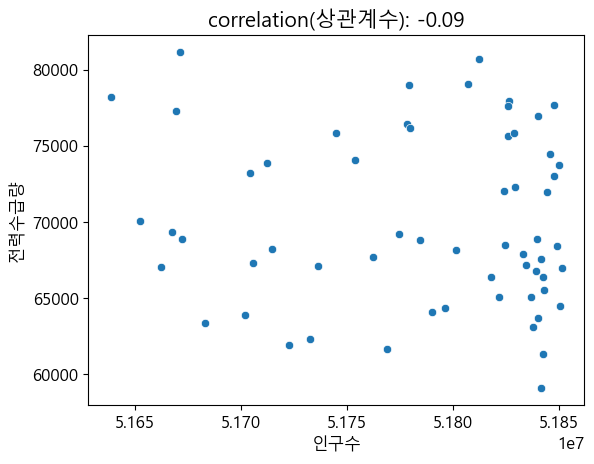

In [16]:
# 인구수와 전력수급량 간의 상관계수 계산하여 변수에 저장
correlation = pop_elect['인구수'].corr(pop_elect['전력수급량'])
# 인구수와 전력 수급량을 x축과 y축으로 나타냄
sns.scatterplot(x=pop_elect['인구수'], y=pop_elect['전력수급량'])
# 그래프의 제목, x축 라벨, y축 라벨 설정
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=15)
plt.xlabel("인구수", fontsize=12)
plt.ylabel("전력수급량", fontsize=12)
plt.show()